In [3]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
 study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# merge the data
master_df = mouse_metadata.merge(study_results, on='Mouse ID')

In [7]:
master_df = master_df.rename(columns=lambda x: x.lower().replace(' ', '_'))

In [38]:
 master_df.count()

mouse_id              1893
drug_regimen          1893
sex                   1893
age_months            1893
weight_(g)            1893
timepoint             1893
tumor_volume_(mm3)    1893
metastatic_sites      1893
dtype: int64

In [9]:
# Checking the number of mice.
num_mice = len(master_df['mouse_id'].unique())
num_mice

249

In [10]:
len(master_df['mouse_id']) - num_mice

1644

In [11]:
len(master_df.drop_duplicates()['mouse_id'])

1892

In [12]:
# Find the duplicate mouse
dup_mouse = master_df.loc[master_df.duplicated(subset=['mouse_id', 'timepoint']), 'mouse_id'].unique()
dup_mouse[0]

'g989'

In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = master_df[master_df['mouse_id'].isin(dup_mouse) == False]

In [37]:
clean_df.count()

mouse_id              1880
drug_regimen          1880
sex                   1880
age_months            1880
weight_(g)            1880
timepoint             1880
tumor_volume_(mm3)    1880
metastatic_sites      1880
dtype: int64

In [15]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['mouse_id'].unique())

248

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
means = clean_df.groupby('drug_regimen').mean()['tumor_volume_(mm3)']
medians = clean_df.groupby('drug_regimen').median()['tumor_volume_(mm3)']
variance = clean_df.groupby('drug_regimen').var()['tumor_volume_(mm3)']
std_dev = clean_df.groupby('drug_regimen').std()['tumor_volume_(mm3)']
std_err = clean_df.groupby('drug_regimen').sem()['tumor_volume_(mm3)']

In [40]:
summary_table = pd.DataFrame({
    'mean_tumor_volume': means,
    'median_tumor_volume': medians,
    'tumor_volume_variance': variance,
    'tumor_volume_std_dev': std_dev,
    'tumor_volume_std_err': std_err
})
summary_table

,mean_tumor_volume,median_tumor_volume,tumor_volume_variance,tumor_volume_std_dev,tumor_volume_std_err
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#   and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
clean_df.groupby('drug_regimen').agg({
    'tumor_volume_(mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

tumor_volume_(mm3)                                          
                           mean     median        var       std       sem
drug_regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [19]:
clean_df.columns

Index(['mouse_id', 'drug_regimen', 'sex', 'age_months', 'weight_(g)',
       'timepoint', 'tumor_volume_(mm3)', 'metastatic_sites'],
      dtype='object')

Index(['mouse_id', 'drug_regimen', 'sex', 'age_months', 'weight_(g)',
       'timepoint', 'tumor_volume_(mm3)', 'metastatic_sites'],
      dtype='object')

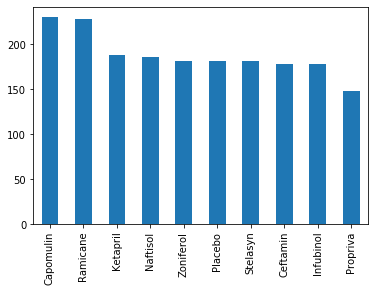

In [21]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
clean_df['drug_regimen'].value_counts().plot(kind='bar')

In [22]:
clean_df['drug_regimen'].value_counts().values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

<BarContainer object of 10 artists>

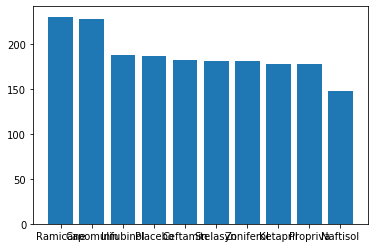

In [24]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(x=clean_df['drug_regimen'].unique(), 
        height=clean_df['drug_regimen'].value_counts().values)

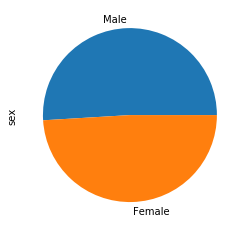

In [27]:
 # Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_df['sex'].value_counts()
gender_count.plot(kind='pie')

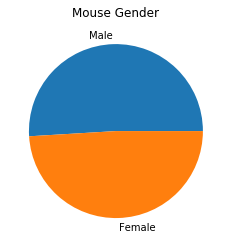

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count.values, labels=gender_count.index)
plt.title('Mouse Gender')
plt.show()

In [30]:
 # Start by getting the last (greatest) timepoint for each mouse
# Using reset_index will return the series as a dataframe
max_df = clean_df.groupby('mouse_id')['timepoint'].max().reset_index()

In [31]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_merge = clean_df.merge(max_df, on=['mouse_id', 'timepoint'])

In [32]:
max_merge

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3
